In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split ,StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

df=pd.read_csv("diabetes.csv")

X=df.iloc[:,:8].values
y=df['Outcome'].values

X=StandardScaler().fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,shuffle=True)

kfold=StratifiedKFold(n_splits=5,random_state=15,shuffle=True)

clf_DT=DecisionTreeClassifier(random_state=15).fit(X_train,y_train)
results=cross_val_score(clf_DT,X_train,y_train,cv=kfold)
print("Decision Tree (stand alone)-Train:",results.mean())
print("Decision Tree(stand alone)-Test:",metrics.accuracy_score(clf_DT.predict(X_test),y_test))



Decision Tree (stand alone)-Train: 0.6986805277888843
Decision Tree(stand alone)-Test: 0.6948051948051948


In [9]:
num_trees=100
clf_DT_Bag=BaggingClassifier(estimator=clf_DT,n_estimators=num_trees,random_state=15).fit(X_train,y_train)
results=cross_val_score(clf_DT_Bag,X_train,y_train,cv=kfold)

print("\n Decision Tree (Bagging)-Train:",results.mean())
print("Decision Tree (Bagging)-Test:",metrics.accuracy_score(clf_DT_Bag.predict(X_test),y_test))



 Decision Tree (Bagging)-Train: 0.7524590163934426
Decision Tree (Bagging): 0.7402597402597403


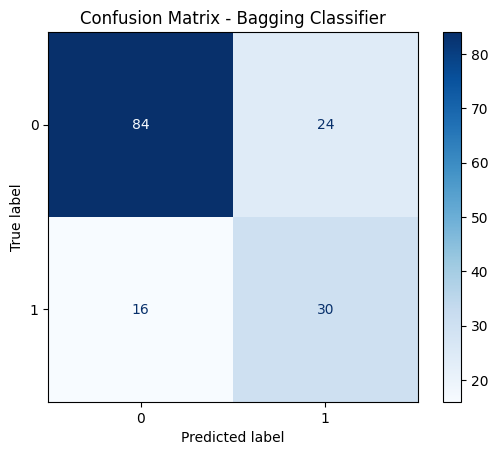

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for Bagging model
cm = confusion_matrix(y_test, clf_DT_Bag.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Bagging Classifier")
plt.show()

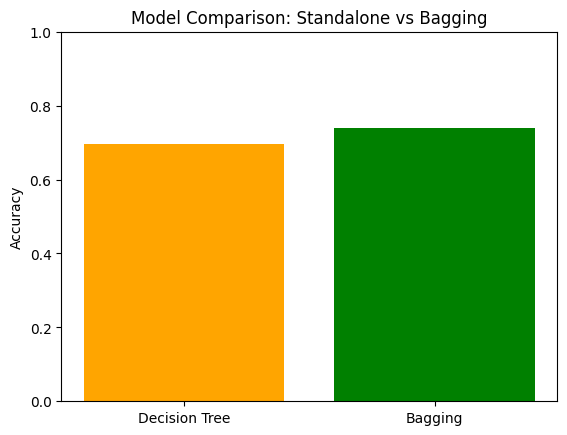

In [11]:
from matplotlib import pyplot as plt
models = ["Decision Tree", "Bagging"]
scores = [metrics.accuracy_score(y_test, clf_DT.predict(X_test)),
          metrics.accuracy_score(y_test, clf_DT_Bag.predict(X_test))]

plt.bar(models, scores, color=['orange','green'])
plt.ylabel("Accuracy")
plt.title("Model Comparison: Standalone vs Bagging")
plt.ylim(0,1)
plt.show()


FEATURE IMPORTANCE

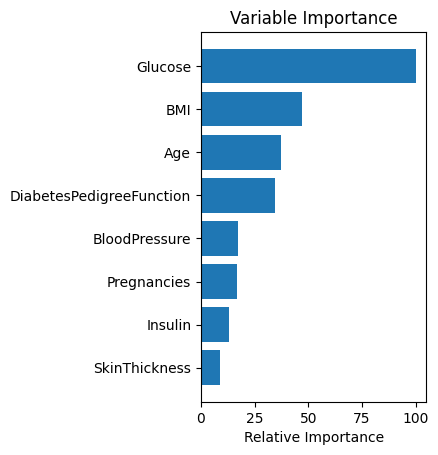

In [15]:
import numpy as np

feature_importance=clf_DT.feature_importances_
feature_importance=100.0*(feature_importance/feature_importance.max())
sorted_idx=np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+.5

plt.subplot(1,2,2)
plt.barh(pos,feature_importance[sorted_idx],align='center')
plt.yticks(pos,df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score

num_trees=100

kfold=StratifiedKFold(n_splits=5,random_state=15,shuffle=True)

clf_RF=RandomForestClassifier(n_estimators=num_trees).fit(X_train,y_train)
results=cross_val_score(clf_RF,X_train,y_train,cv=kfold)

print("\nRandom Forest (Bagging)-Train:",results.mean())
print("Random Forest (Bagging)-Test:",metrics.accuracy_score(clf_RF.predict(X_test),y_test))


Random Forest (Bagging)-Train: 0.7573903771824603
Random Forest (Bagging)-Test: 0.7597402597402597


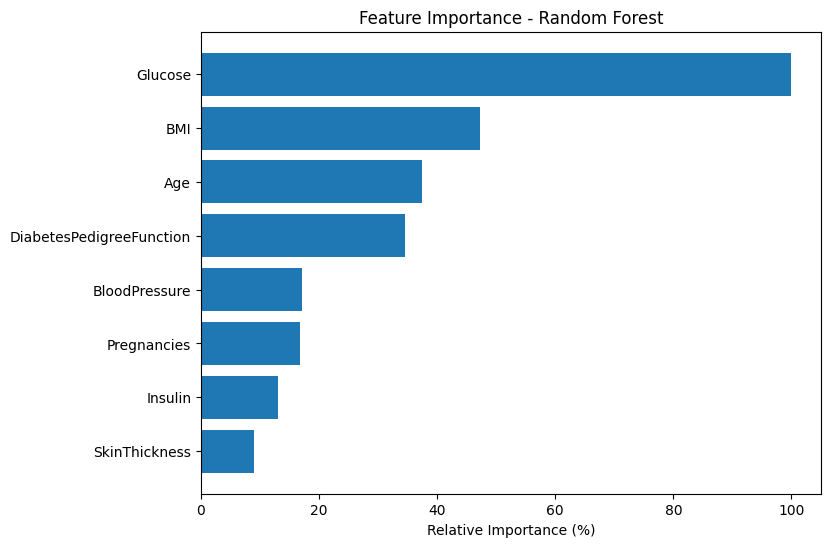

In [19]:
plt.figure(figsize=(8,6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance (%)')
plt.title('Feature Importance - Random Forest')
plt.show()

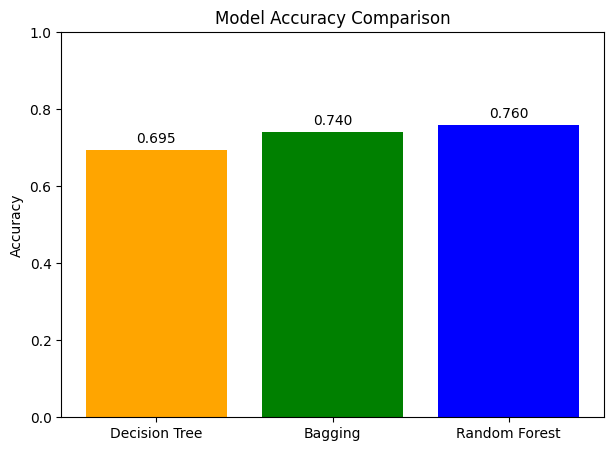

In [20]:
import matplotlib.pyplot as plt


models = ["Decision Tree", "Bagging", "Random Forest"]
scores = [
    metrics.accuracy_score(y_test, clf_DT.predict(X_test)),
    metrics.accuracy_score(y_test, clf_DT_Bag.predict(X_test)),
    metrics.accuracy_score(y_test, clf_RF.predict(X_test))
]


plt.figure(figsize=(7,5))
bars = plt.bar(models, scores, color=["orange", "green", "blue"])


for bar, score in zip(bars, scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{score:.3f}", ha="center", va="bottom")

plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()
